## Upper Confidence Bound Learning

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

##### Reinforcement Learning
Reinforcement Learning is a method of learning where we progressively learn the changes according to the input. Basically, the idea is that we predict the $K^{th}$ result from the outputs of the $K-1$ inputs.

#### Upper Confidence Bound Learning

The basic idea of this method is to avoid the computational and time of the a/b testing for determining the best of the options. This is done by fixing a standard upper bound and then we select one and do the first testing and compare it with the result. We give it a score 1 if it is successful and 0 if it is not. And in doing so, the confidence interval and the upper bound of the result of the various options converge to the actual one and that is exploited further by choosing the highest upper bound of the options. 

<img src='https://i.ytimg.com/vi/oLoozS5-jjU/maxresdefault.jpg' style='margin:0px;' width=800>

This type of reinforcement learning is much more efficient than the classic a/b testing or random selection.

<a id='preprocessing'></a>
### Pre processing

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


The basic dataset that is provided is a simulation of how different users will react to the different types of ads. The main idea is that, we do not know about this and this is updated in real time by displaying it to the user and then we process it according to wheather the user likes it or not. Since it is not like the other data sets of values or anything, we do not need to perform any form of preprocessing or adjustments.

<a id='building'></a>
### Building the model.
Here, we build the algorithm from scratch.

In [3]:
# initializing the basic variables and their values.
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [11]:
# the main algorithm of our UCB implementation in python
for n in range(0, N):
    ad = 0
    # max upper bound is reset every round.
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            # The basic idea behind this step is to initially select the first ten ads, and proceed accordingly
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

<a id='result'></a>
### Result

Now that we have the model set and the result stored inside the ad_selected, let us build a model out of random selection just for comparision.

In [10]:
import random
N_rnd = 10000
d_rnd = 10
ads_selected_rnd = []
total_reward_rnd = 0
for n_rnd in range(0, N_rnd):
    ad_rnd = random.randrange(d_rnd)
    ads_selected_rnd.append(ad_rnd)
    reward_rnd = dataset.values[n_rnd, ad_rnd]
    total_reward_rnd = total_reward_rnd + reward_rnd

In [12]:
print('Total reward for UCB', total_reward)
print('Total reward for Random Selection', total_reward_rnd)

Total reward for UCB 3927
Total reward for Random Selection 1231


From this, it is clear that the UCB has a better predicition compared to just randomly selecting the ads. Now let us visualise the results.

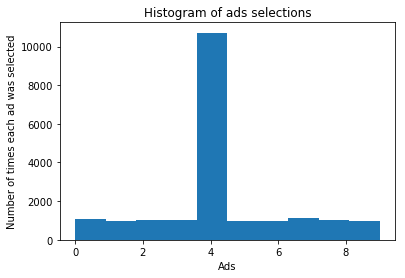

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

##### The 4th ad wins

From this, it is clear that the 4th ad was the one that was liked by the users. Using this method, we can actually build models that help us improvise the marketing by selecting the correct ads.

##### Conclusion

This method is very effective when we do not know the end result, i.e our dataset. We derive the mean of that dataset using UCB, that is the point of using UCB.